In [1]:
import os
from classy import Class
from matplotlib import pyplot as plt
from fit_test import *
from scipy.stats import gaussian_kde
import matplotlib.lines as mlines
import corner
from getdist import plots, MCSamples
import getdist
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = [20, 12]

2024-04-19 14:05:15.160367: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/rneveux/local/lib:/home/rneveux/lib:/home/rneveux/cuba
2024-04-19 14:05:15.160396: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
directory = {61:'/home/rneveux/fit_results/Fake/z0.610/', 38:'/home/rneveux/fit_results/Fake/z0.380/'}

In [3]:
pk_61 = np.load(os.path.join(directory[61], 'Pk_0_2_kmin1_kmaxpk22.npy'),allow_pickle=True).item()
pbk_61 = np.load(os.path.join(directory[61], 'Pk_Bk_0_2_000_202_kmin1_kmaxpk22_kmaxbk10.npy'),allow_pickle=True).item()
pbk_61_rescaled = np.load(os.path.join(directory[61], 'Pk_Bk_0_2_000_202_kmin1_kmaxpk22_kmaxbk10_rescaled10.npy'),allow_pickle=True).item()
pbk_38 = np.load(os.path.join(directory[38], 'Pk_Bk_0_2_000_202_kmin1_kmaxpk22_kmaxbk10.npy'),allow_pickle=True).item()

In [9]:
mapping_name_label = {'omega_cdm':'\omega_{cdm}',
                      'omega_b':'\omega_b',
                      'h':'h',
                      'ln10^{10}A_s':'\log(10^{10}A_s)',
                        'b1':'b_1', 
                      'b2': 'b_2', 
                      'bG2': 'b_{G_2}', 
                      'bGamma3': 'b_{\Gamma_3}', 
                      'c0': 'c_0', 
                      'c2pp': 'c_{pk,2}', 
                      'c4pp': 'c_{pk,4}', 
                      'c1': 'c_1', 
                      'c2': 'c_2', 
                      'ch': 'c_h', 
                      'Pshot': 'P_{shot}', 
                      'a0': 'a_0', 
                      'Bshot': 'B_{shot}',
                    'fnlequi': 'f_{NL}^{equi}',
                    'fnlortho': 'f_{NL}^{ortho}'}
truth = {'h':.673, 'ln10^{10}A_s':3.044, 'omega_b':.022, 'omega_cdm':.1216, 'Omega_m':.317}
cosmo_params = ['h', 'ln10^{10}A_s', 'omega_cdm']

In [5]:
ranges_pbk = {}
for b in pbk_61['prior']:
    if pbk_61['prior'][b]['type'] == 'Uni':
        ranges_pbk[b] = pbk_61['prior'][b]['lim']
names_pbk = pbk_61['params_fit_sorted']
labels_pbk =  [mapping_name_label[b] for b in names_pbk]

ranges_pk = {}
for b in pk_61['prior']:
    if pk_61['prior'][b]['type'] == 'Uni':
        ranges_pk[b] = pk_61['prior'][b]['lim']
names_pk = pk_61['params_fit_sorted']
labels_pk =  [mapping_name_label[b] for b in names_pk]

In [6]:
pk_61_sample = getdist.MCSamples(samples=pk_61['sampler']['samples'], names = names_pk, labels = labels_pk, ranges=ranges_pk, label='Pk 0.61')
pbk_61_sample = getdist.MCSamples(samples=pbk_61['sampler']['samples'], 
                                  names = names_pbk, labels = labels_pbk, ranges=ranges_pbk, label='Pk Bk 0.61')
pbk_61_rescaled_sample = getdist.MCSamples(samples=pbk_61_rescaled['sampler']['samples'], 
                                  names = names_pbk, labels = labels_pbk, ranges=ranges_pbk, label='Pk Bk 0.61 cov/10')
pbk_38_sample = getdist.MCSamples(samples=pbk_38['sampler']['samples'], 
                                  names = names_pbk, labels = labels_pbk, ranges=ranges_pbk, label='Pk Bk 0.38')

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


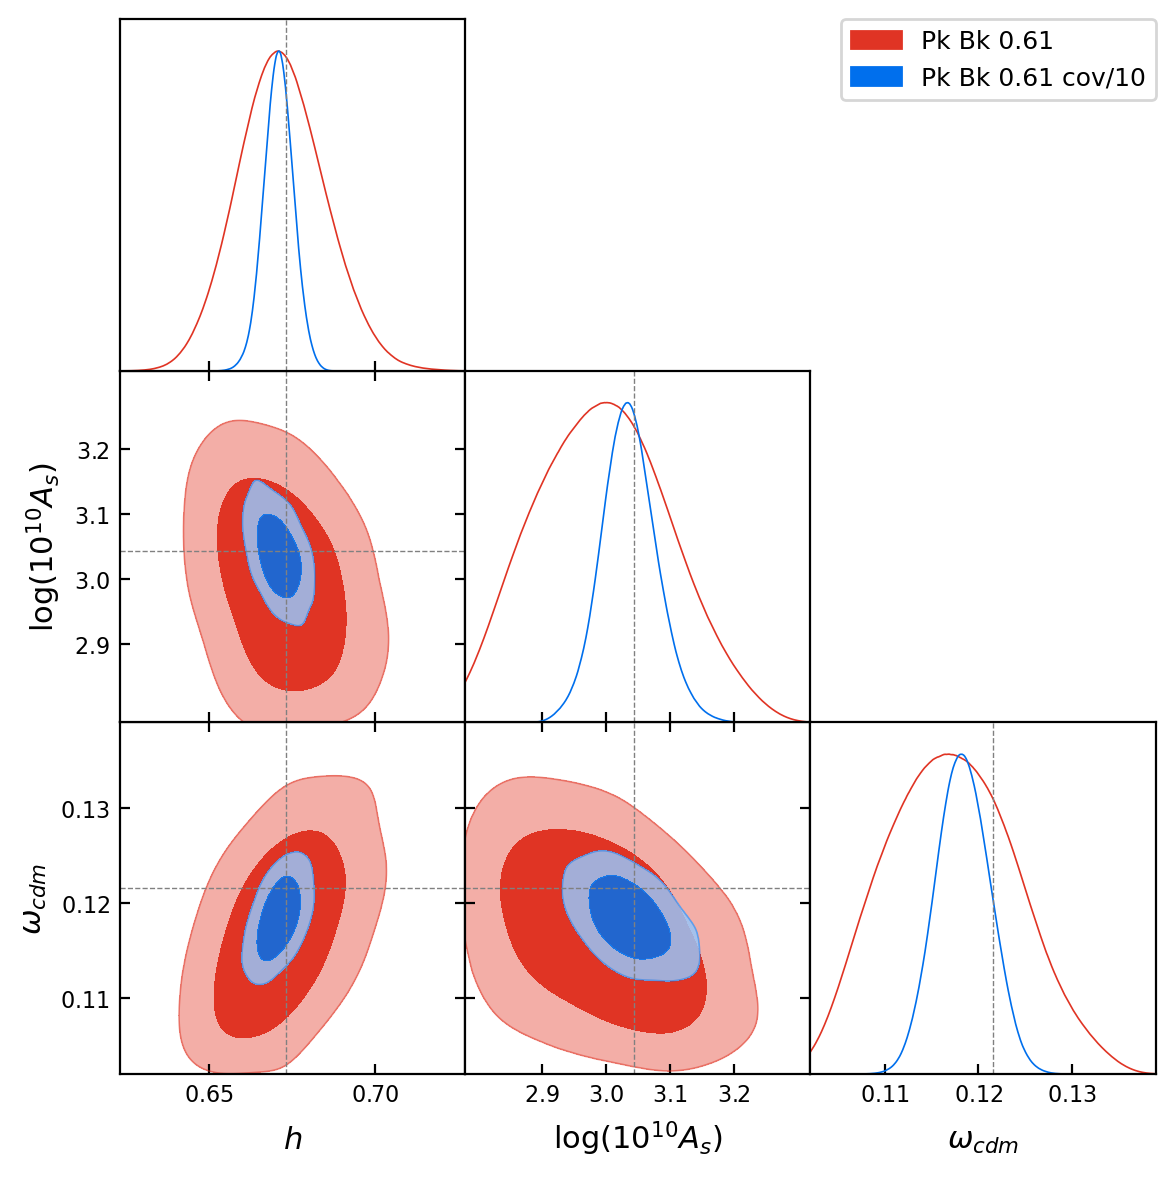

In [10]:
g = plots.get_subplot_plotter()
g.triangle_plot([pbk_61_sample, pbk_61_rescaled_sample], filled=True, params= cosmo_params)

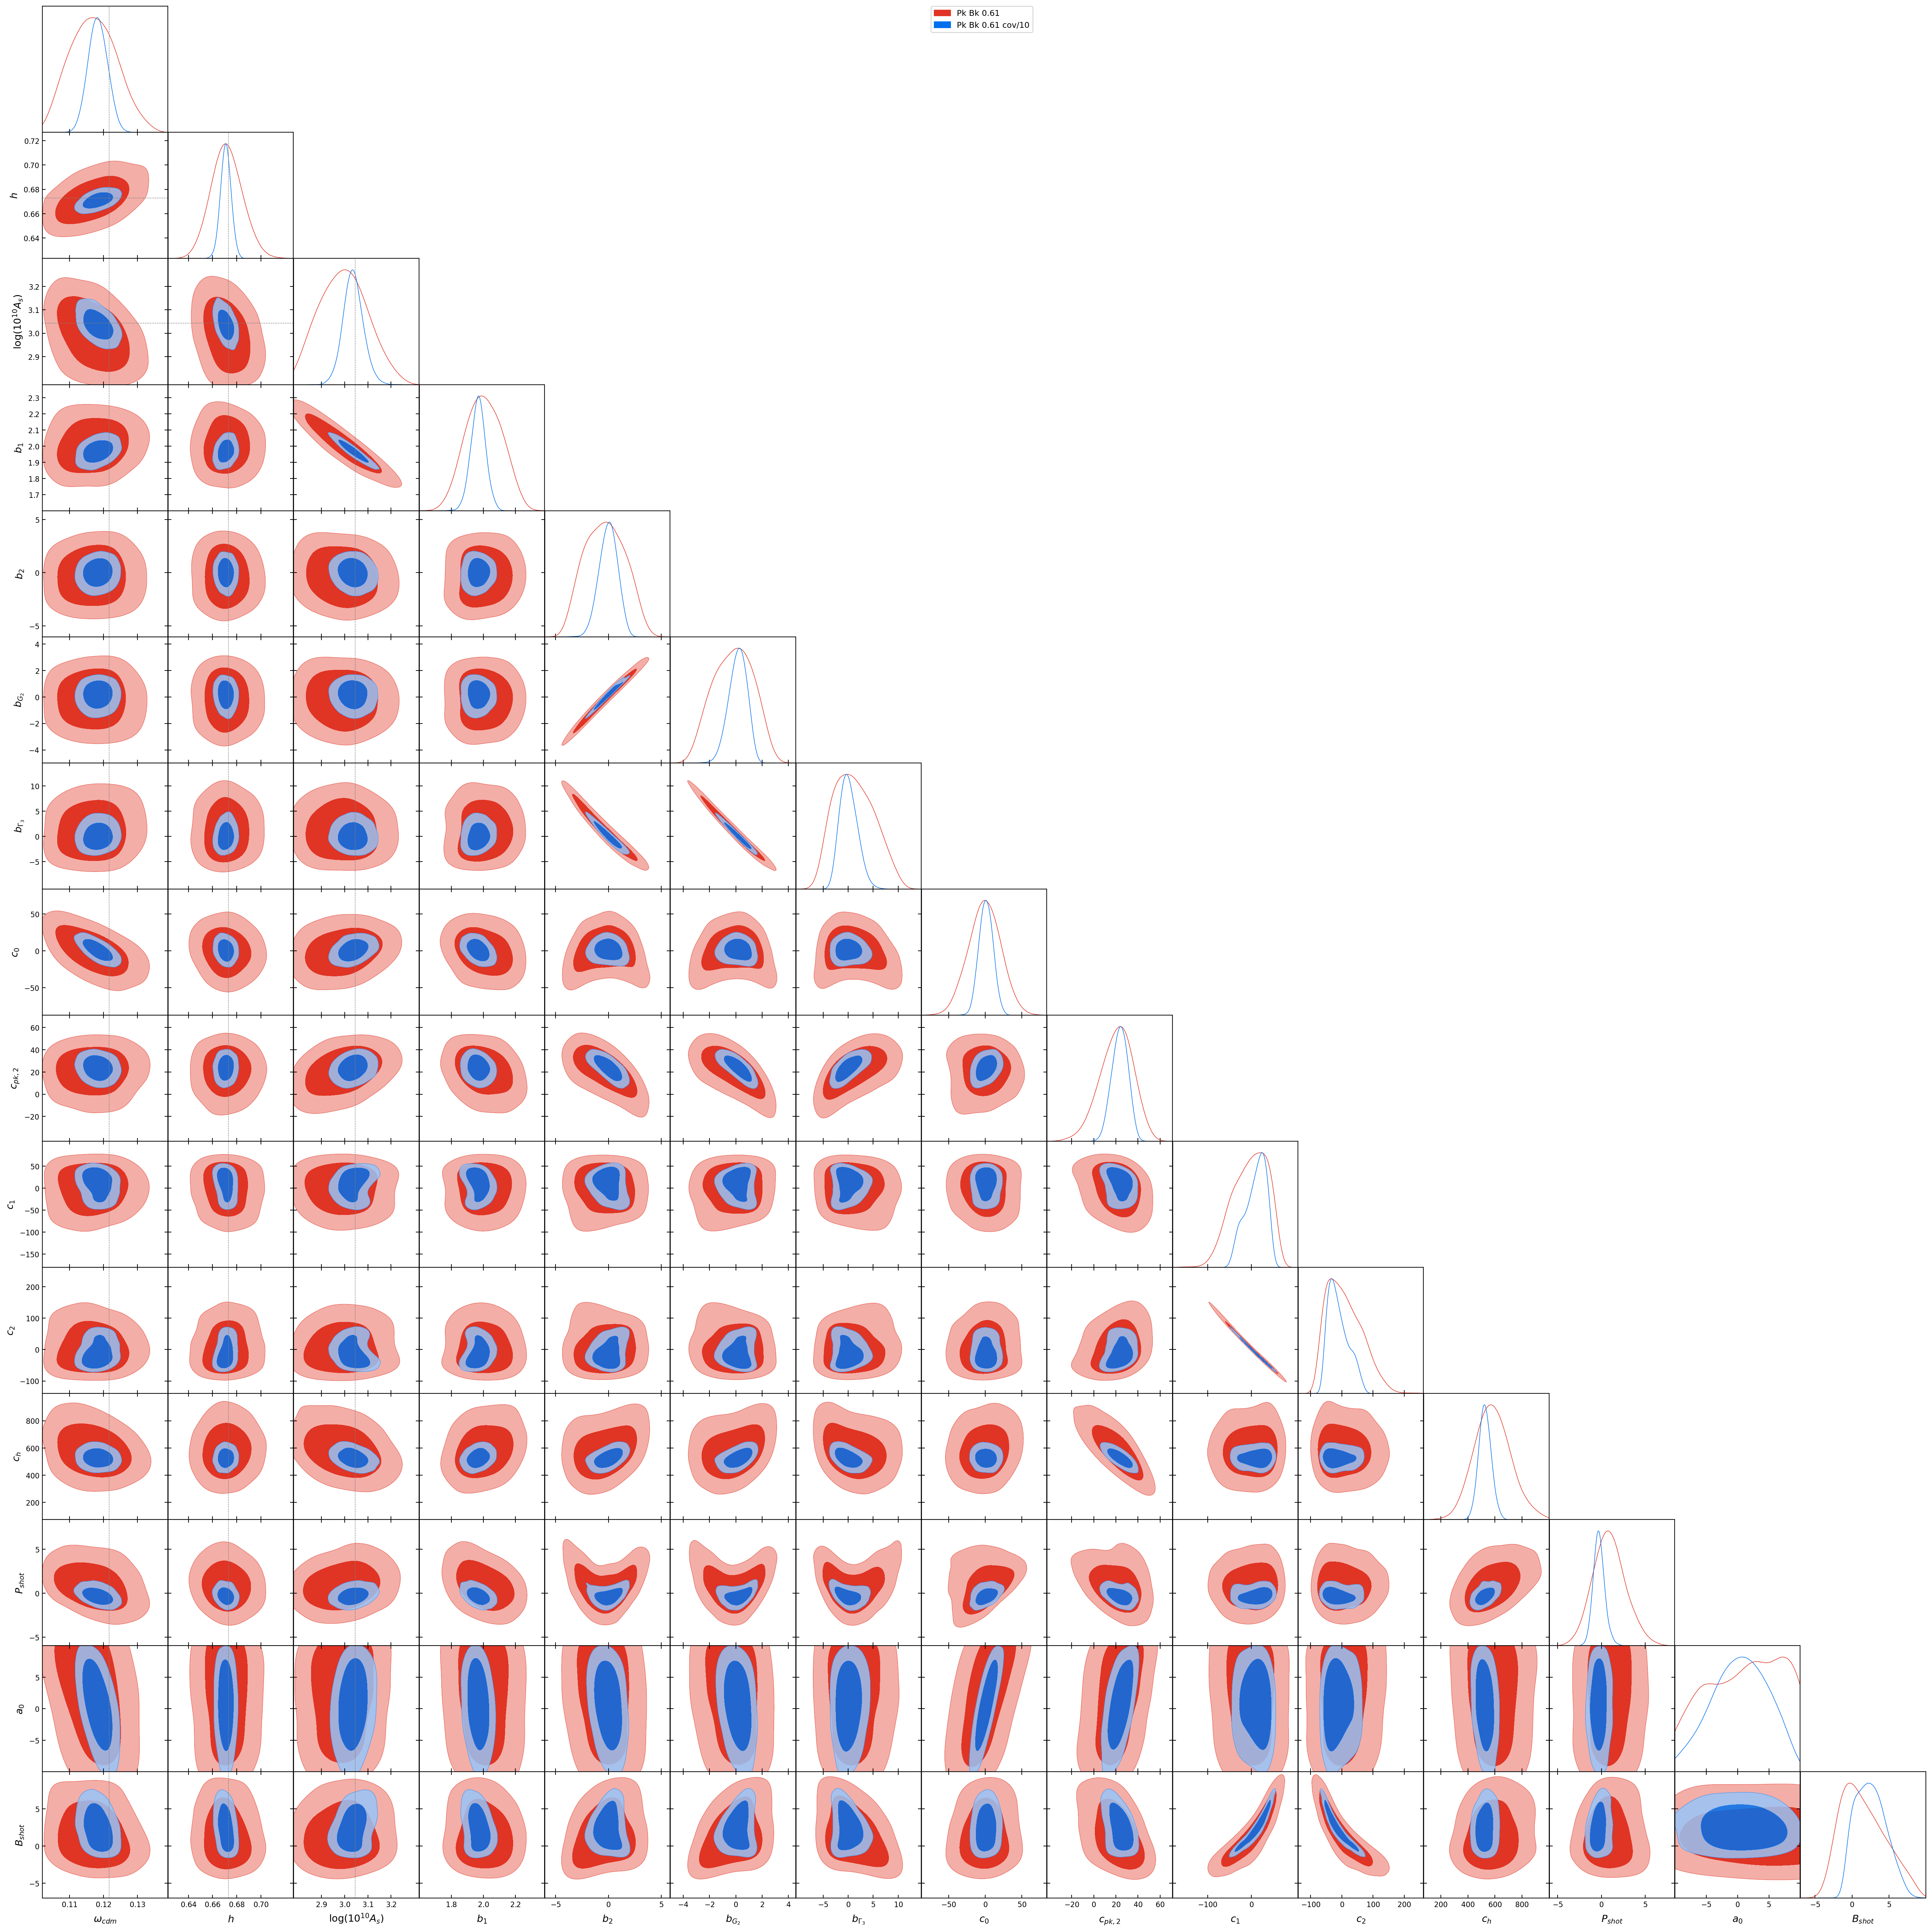

In [11]:
g = plots.get_subplot_plotter()
g.triangle_plot([pbk_61_sample, pbk_61_rescaled_sample], filled=True, markers=truth)

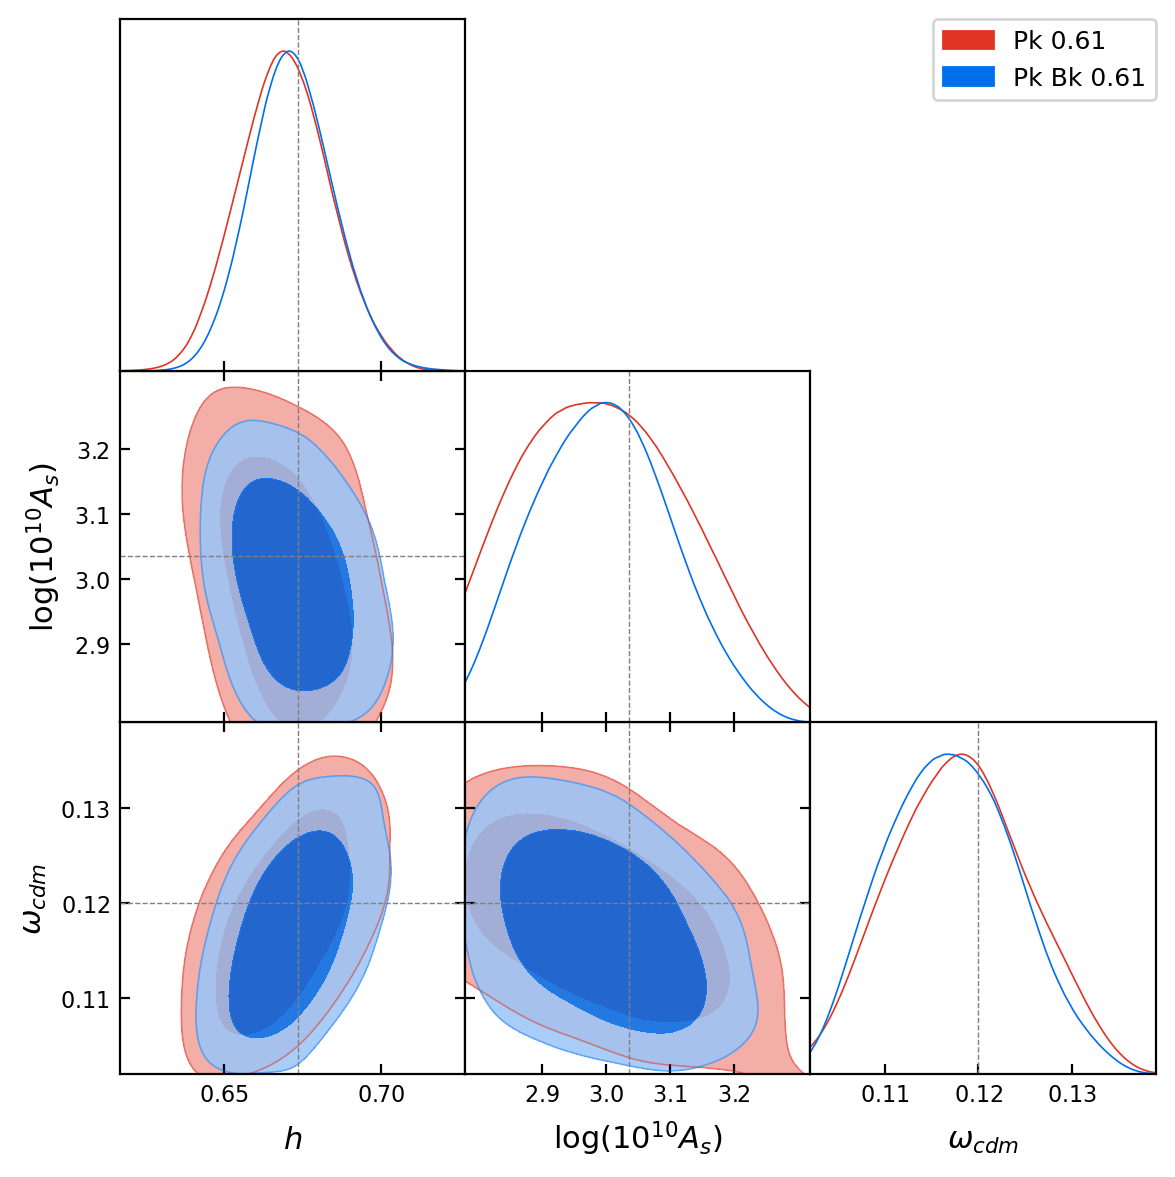

In [12]:
g = plots.get_subplot_plotter()
g.triangle_plot([pk_61_sample, pbk_61_sample], filled=True, markers=truth, params= cosmo_params)

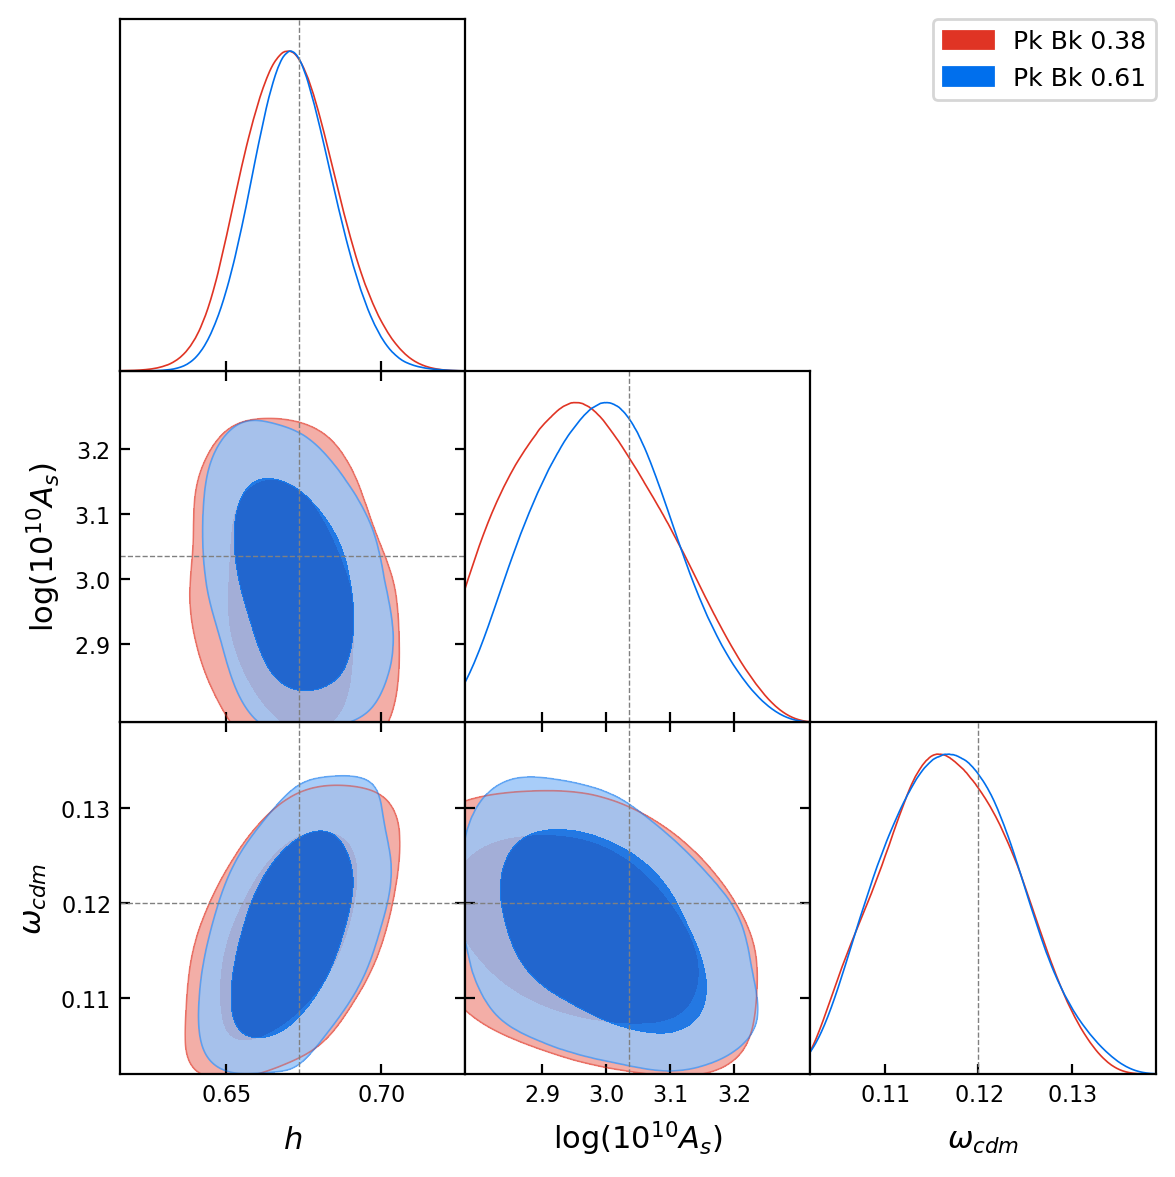

In [13]:
g = plots.get_subplot_plotter()
g.triangle_plot([pbk_38_sample, pbk_61_sample], filled=True, markers=truth, params= cosmo_params)

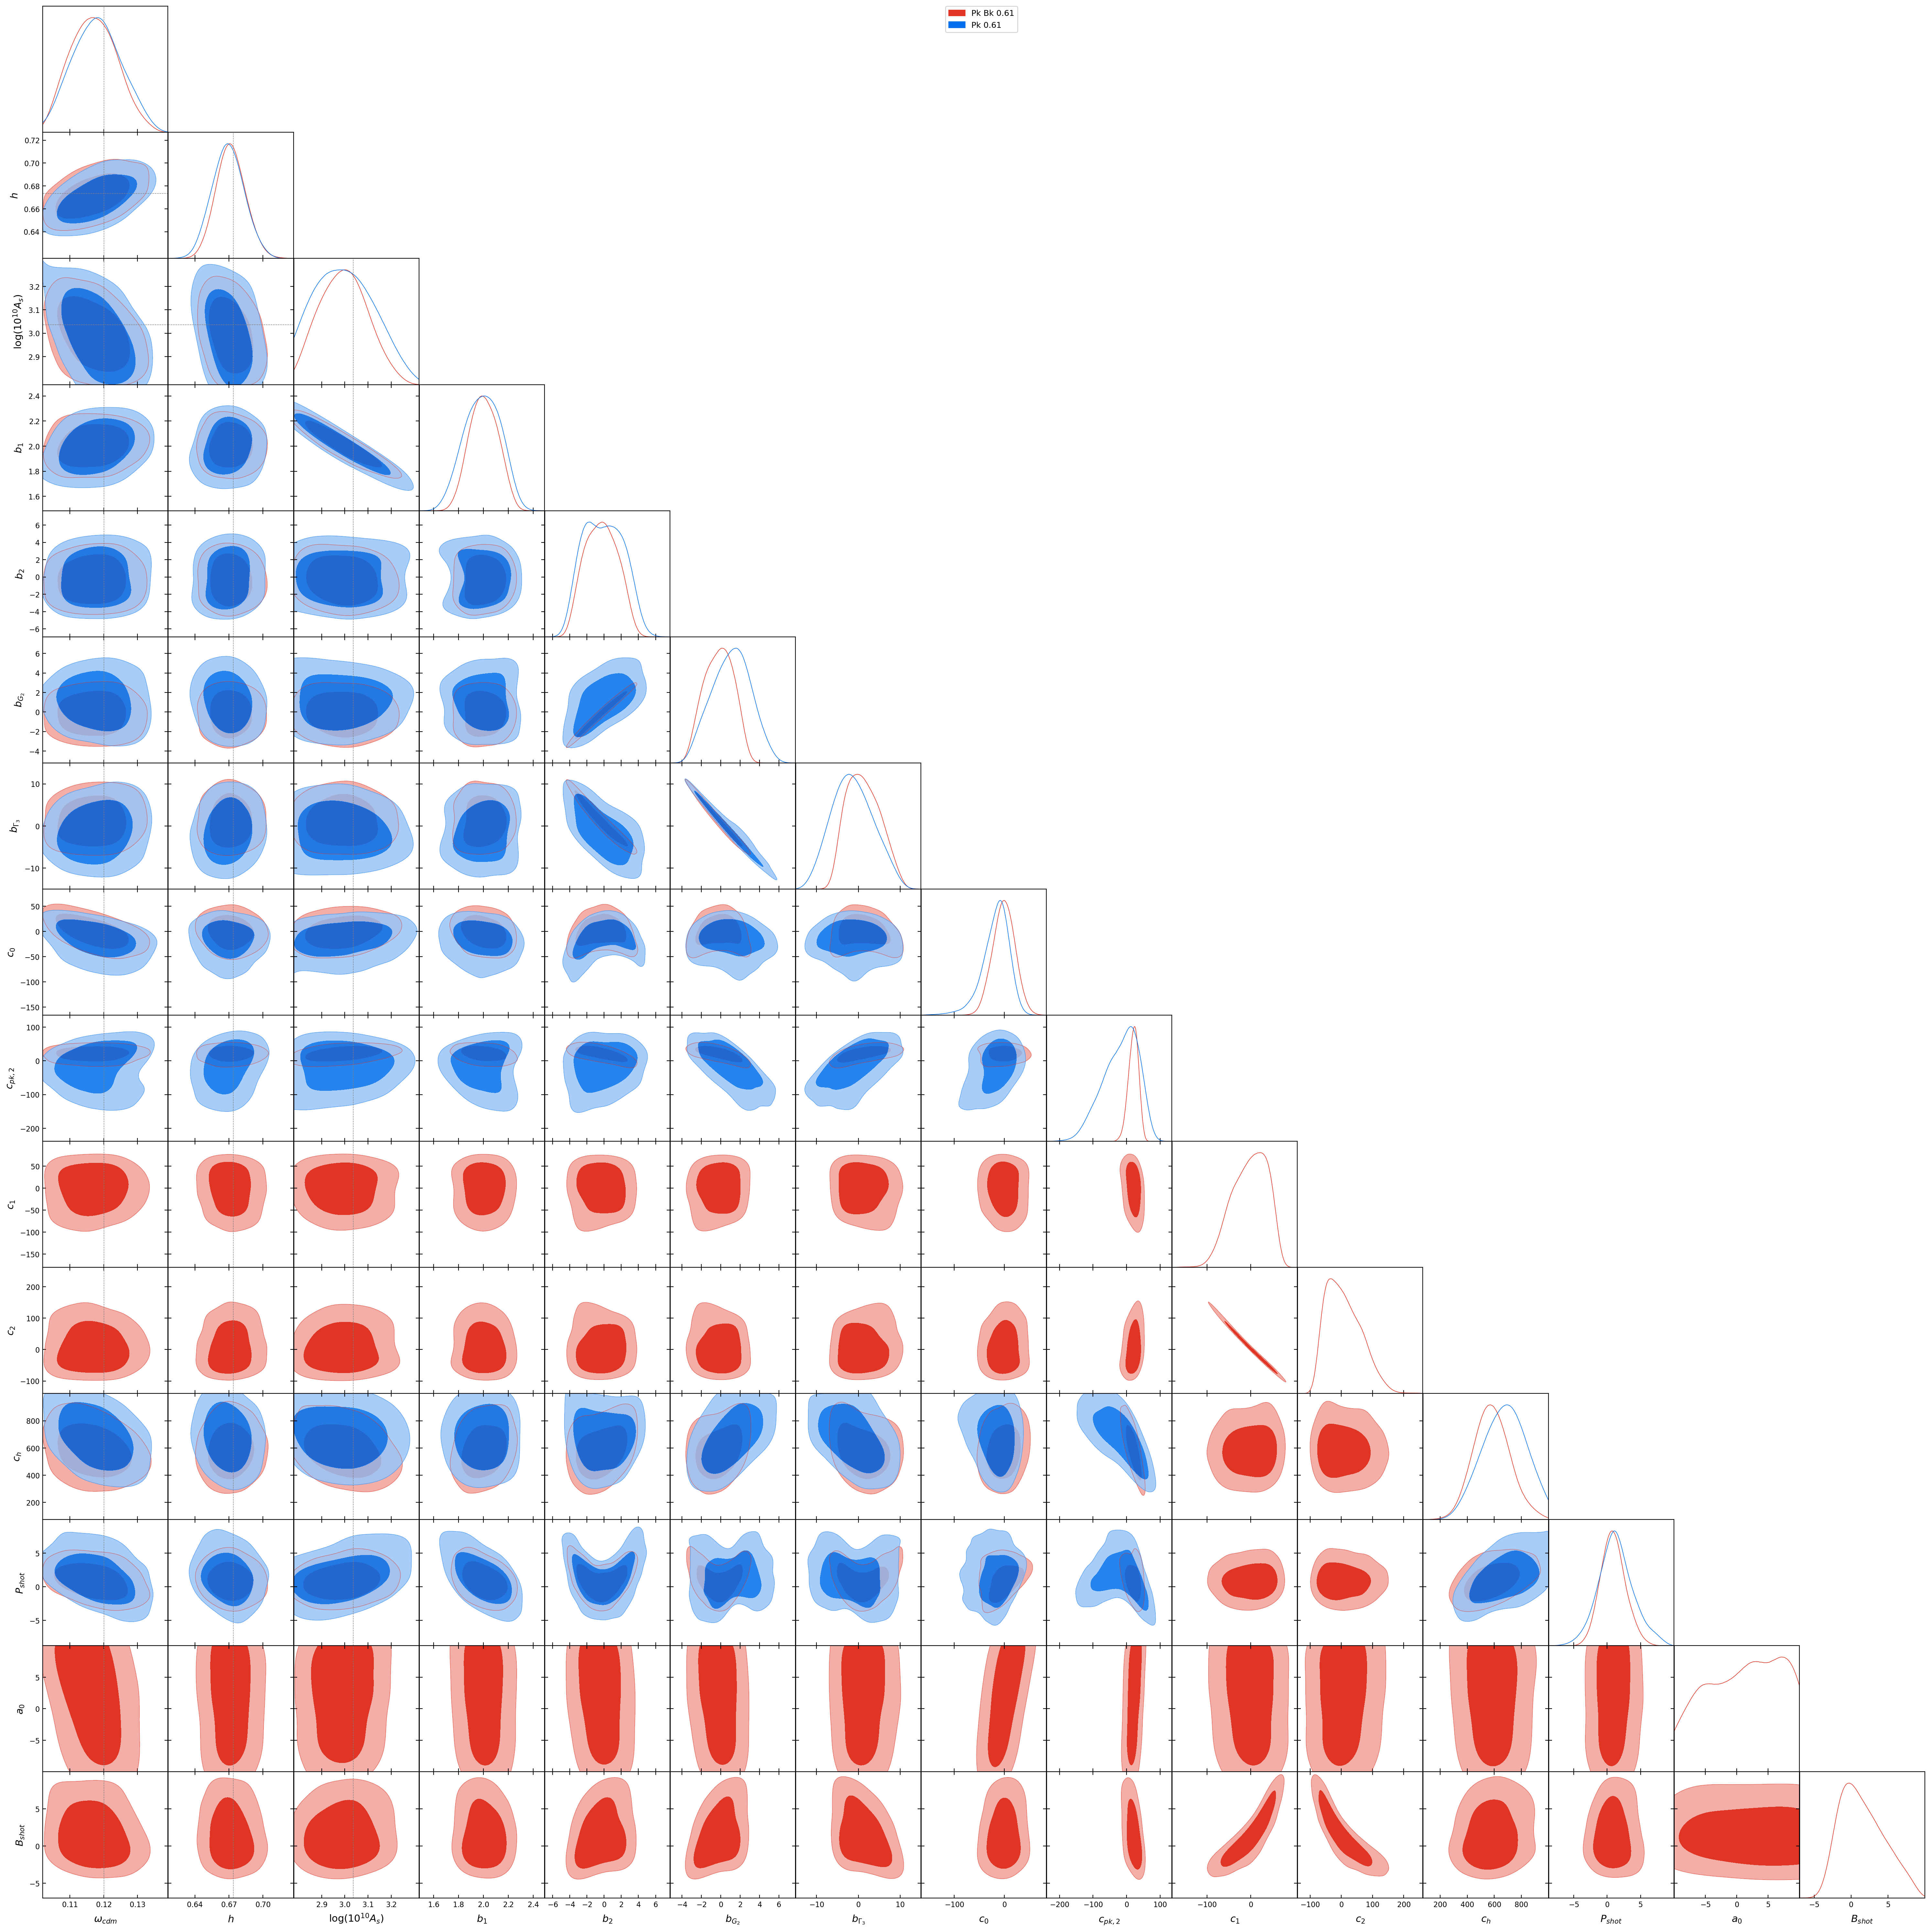

In [17]:
g = plots.get_subplot_plotter()
g.triangle_plot([pbk_61_sample, pk_61_sample], filled=True, markers=truth)

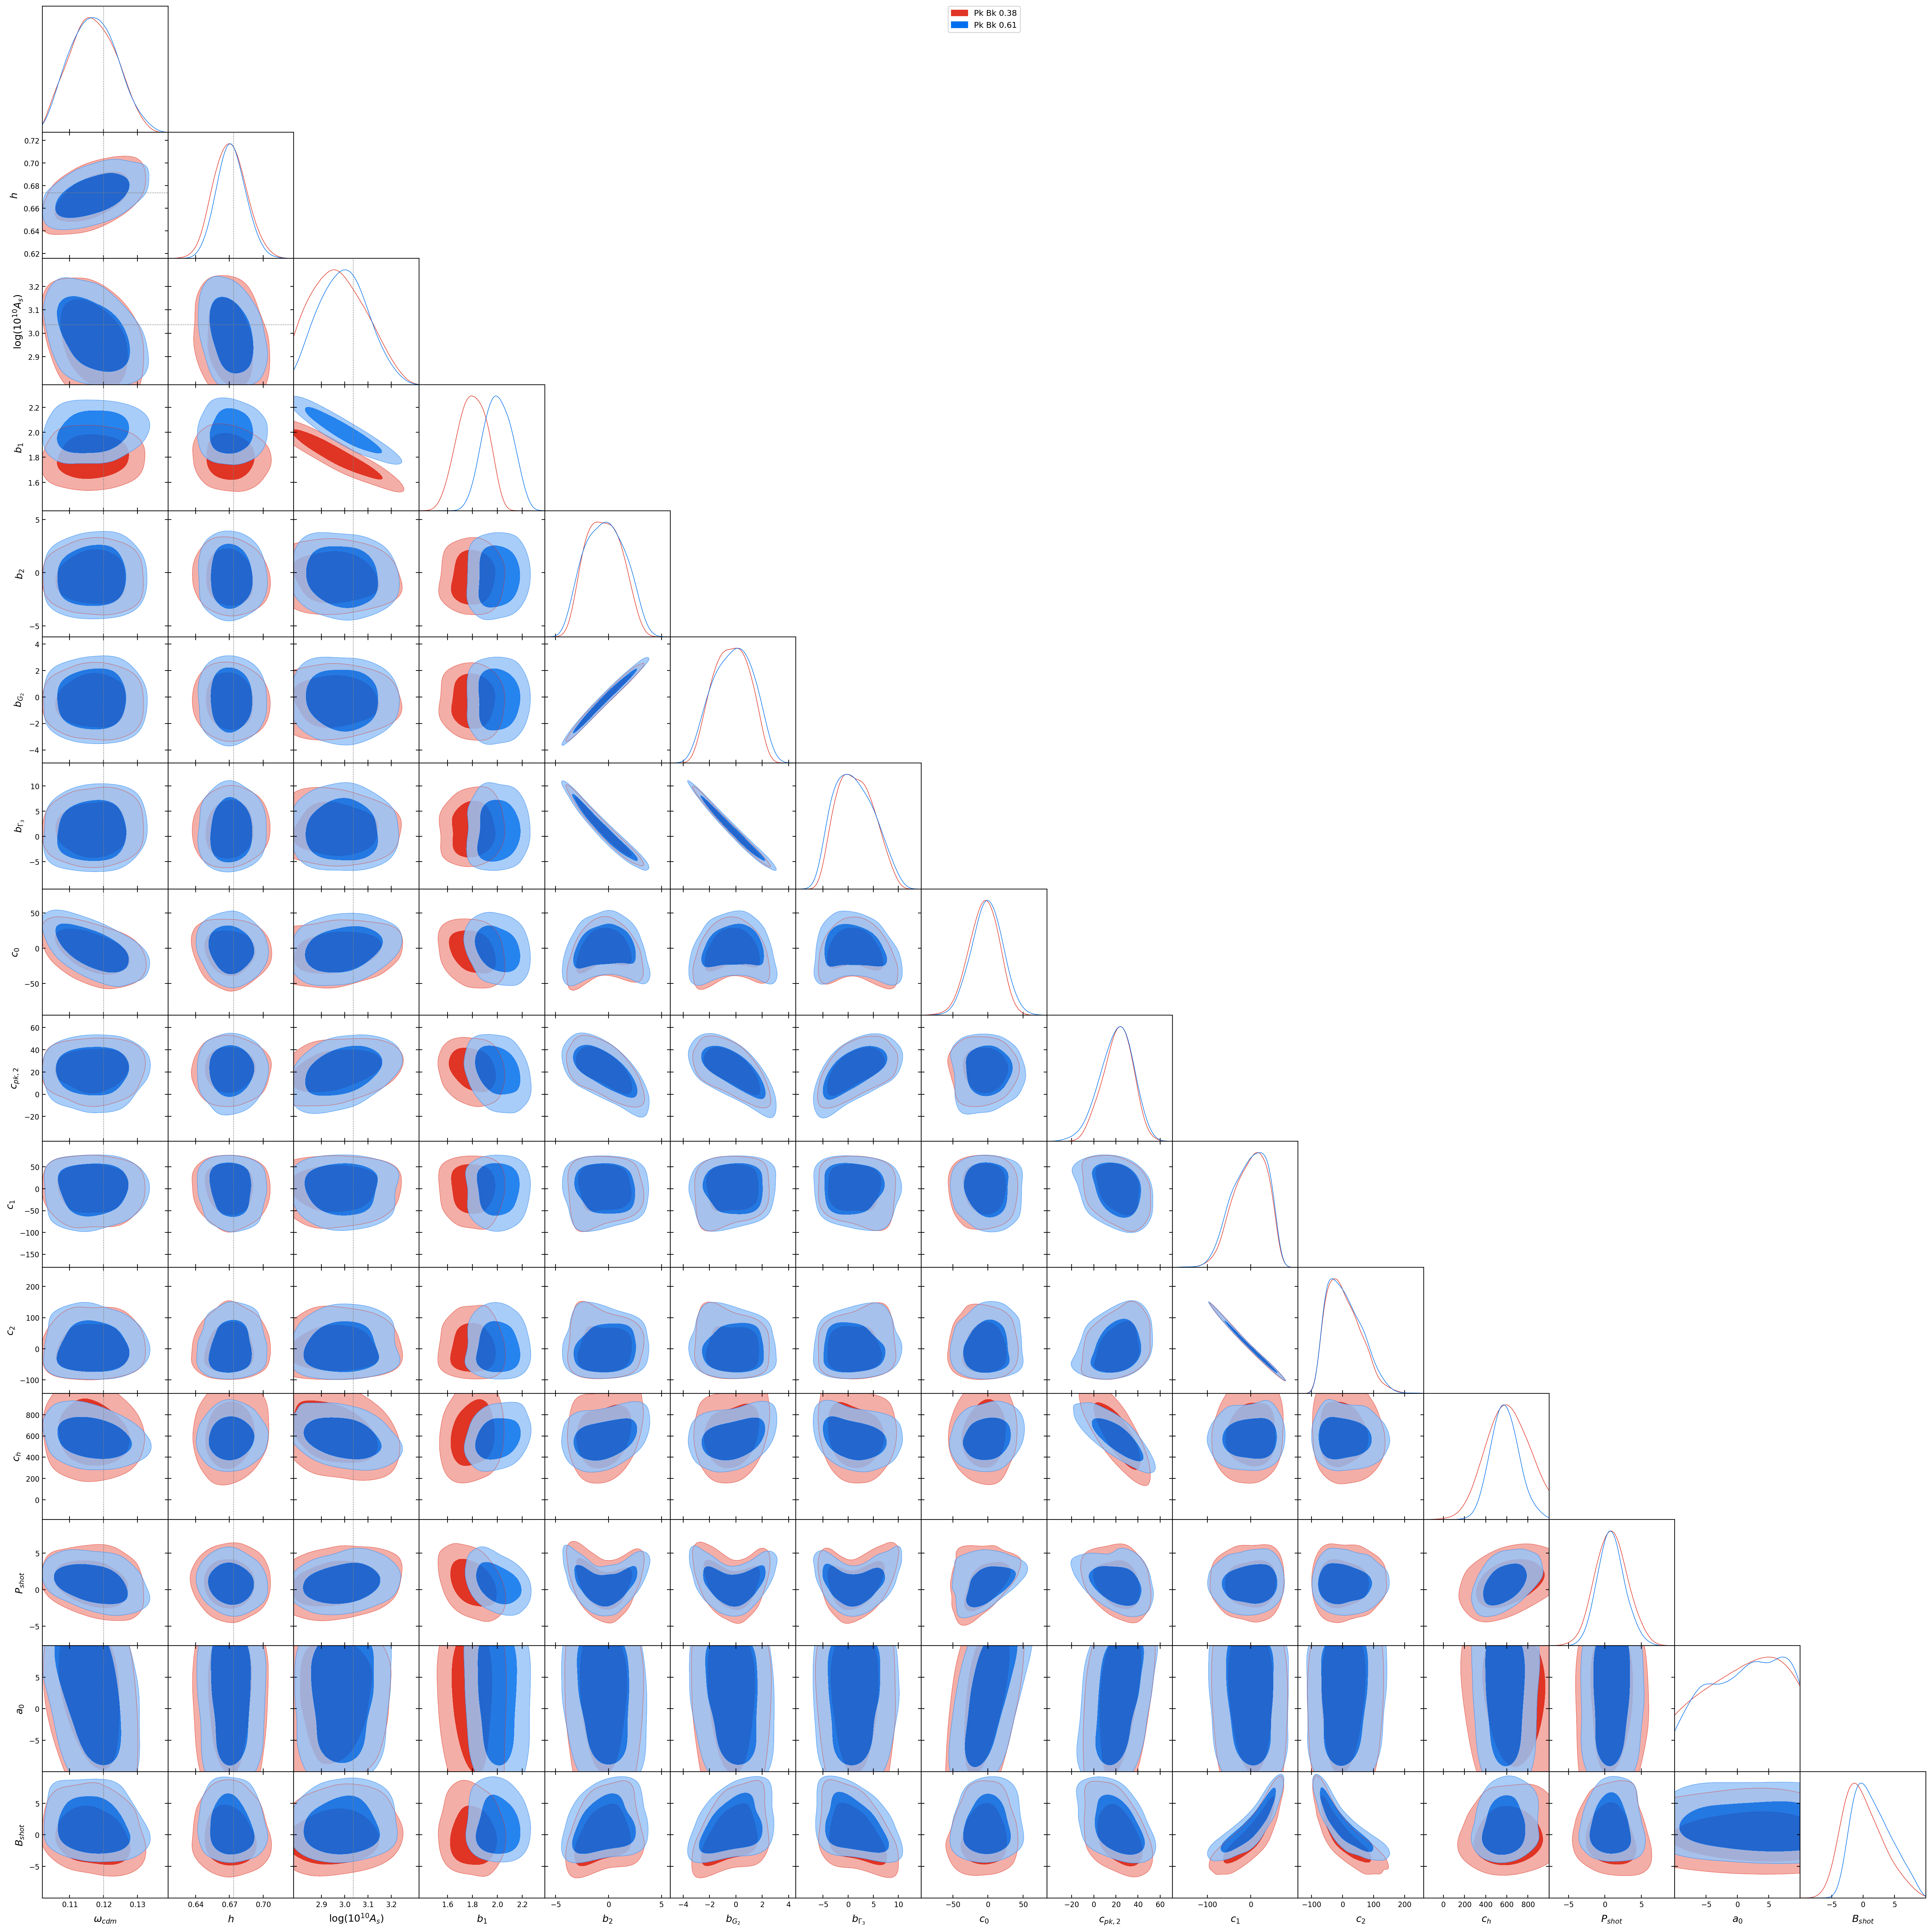

In [15]:
g = plots.get_subplot_plotter()
g.triangle_plot([pbk_38_sample, pbk_61_sample], filled=True, markers=truth)

In [19]:
corr = np.corrcoef(pbk_61['sampler']['samples'], rowvar=False)

In [24]:
for p in range(3):
    print(pbk_61['params_fit_sorted'][p])
    for nuisance in range(len(pbk_61['params_fit_sorted'])):
        print(pbk_61['params_fit_sorted'][nuisance],' ', corr[p,nuisance])

omega_cdm
omega_cdm   0.9999999999999999
h   0.45746492649780757
ln10^{10}A_s   -0.35057864113599085
b1   0.13256962586583698
b2   0.027597166713531712
bG2   -0.009606887984079946
bGamma3   0.08968682642032344
c0   -0.5490400556769741
c2pp   0.02975502036702563
c1   0.025489198042294717
c2   -0.023864415530662746
ch   -0.23843336767490386
Pshot   -0.3028481129041305
a0   -0.23442486505032636
Bshot   -0.15446187631251934
h
omega_cdm   0.4574649264978075
h   1.0
ln10^{10}A_s   -0.2790221665719689
b1   -0.0021453624253241314
b2   -0.026088732494513184
bG2   -0.01117816311693034
bGamma3   0.024334599873615904
c0   -0.0952797313622465
c2pp   0.009813947564325043
c1   -0.07554703096345788
c2   0.0841145548129176
ch   0.05272809303123272
Pshot   -0.08516931683087726
a0   -0.018159583800379357
Bshot   -0.07214036155286717
ln10^{10}A_s
omega_cdm   -0.35057864113599085
h   -0.2790221665719689
ln10^{10}A_s   1.0
b1   -0.9112176225493985
b2   -0.10627420509644891
bG2   -0.04971796528646924
bGamma3